# Betweenness Centrality
In this notebooks we compute the betweenness centrality, and we test its significance.


In [5]:
import sys

sys.path.insert(0, "../")


import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scripts.get_graph import get_graph
import numpy as np
from scripts.hid_haus import hid_hous
import scripts.features_extraction as fe

## Create the graphs

In [6]:
adjacency_matrix = pd.read_csv("../../dataset/adjacency_matrix.csv").values
adjacency_matrix = adjacency_matrix[:, :-1]


graph = get_graph(adjacency_matrix)

# Get the nodes of each partition (diseases and symptoms)
diseases = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
symptoms = set(graph) - diseases

# Create unipartite projections
g_diseases = nx.bipartite.projected_graph(graph, diseases)
g_symptoms = nx.bipartite.projected_graph(graph, symptoms)

## Compute the betweenness centrality

In [7]:
graph_betweenness = nx.betweenness_centrality(graph)
diseases_betweenness = nx.betweenness_centrality(g_diseases)
symptoms_betweenness = nx.betweenness_centrality(g_symptoms)

print("Average Betweenness Centrality:")
print("Whole graph: %.3f" % np.mean(list(graph_betweenness.values())))
print("Diseases projection graph: %.3f" % np.mean(list(diseases_betweenness.values())))
print("Symptoms projection graph: %.3f" % np.mean(list(symptoms_betweenness.values())))

Average Betweenness Centrality:
Whole graph: 0.019
Diseases projection graph: 0.015
Symptoms projection graph: 0.010


In [8]:
# Creates the features for the betweenness of the entire bipartite graph
graph_betweenness_symptoms_only = list(graph_betweenness.items())[-131:]
graph_betweenness_symptoms_only = [val for i, val in graph_betweenness_symptoms_only]

data_onehot = pd.read_csv("../../dataset/one_hot_encoding.csv")
x, y = fe.get_x_y(graph_betweenness_symptoms_only, data_onehot, store_path = "../prediction_model/features/betweennes.npz")

#### Betweenness Centrality Visualization 

Text(0, 0.5, 'Frequency (log scale)')

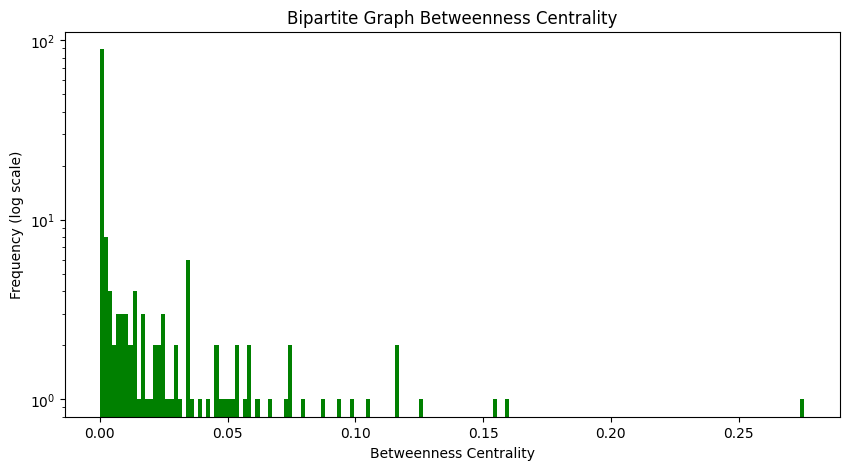

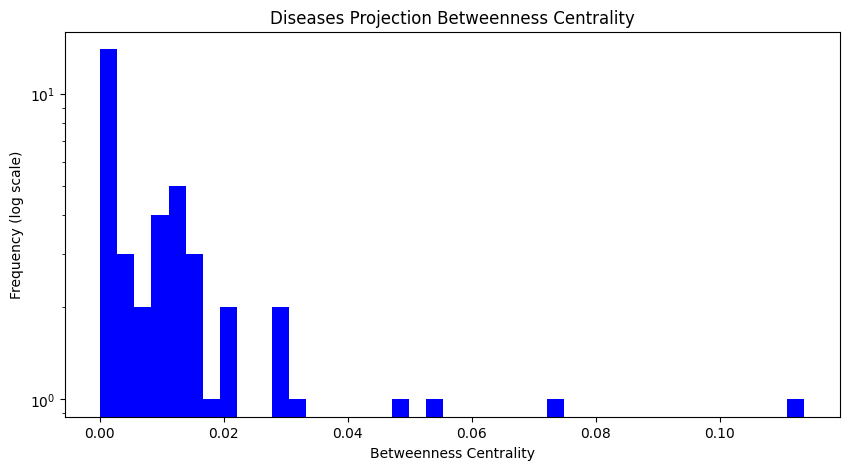

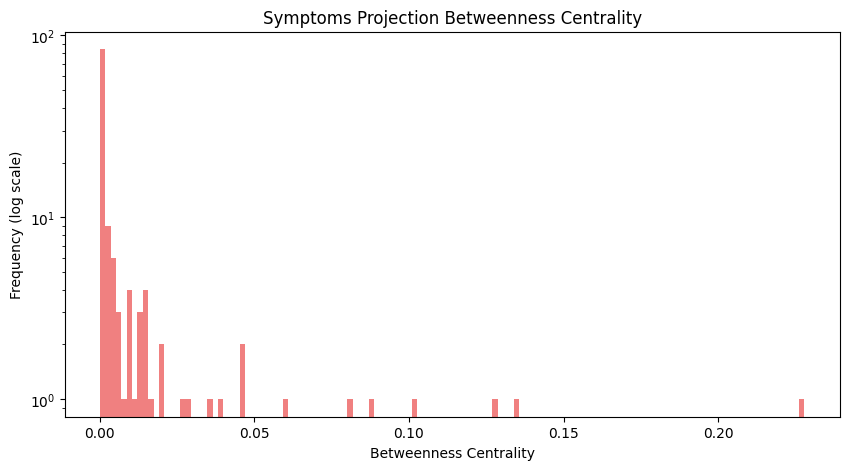

In [9]:
# Comparison of betweenness centrality of the bipartite graph and its projections

# Plot the betweenness centrality of the bipartite graph
plt.figure(figsize=(10, 5))
plt.hist(
    graph_betweenness.values(),
    bins=graph.number_of_nodes(),
    log=True,
    color="green",
)
plt.title("Bipartite Graph Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

# Plot the betweenness centrality of the diseases projection
plt.figure(figsize=(10, 5))
plt.hist(
    diseases_betweenness.values(),
    bins=g_diseases.number_of_nodes(),
    log=True,
    color="blue",
)
plt.title("Diseases Projection Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

# Plot the betweenness centrality of the symptoms projection
plt.figure(figsize=(10, 5))
plt.hist(
    symptoms_betweenness.values(),
    bins=g_symptoms.number_of_nodes(),
    log=True,
    color="lightcoral",
)
plt.title("Symptoms Projection Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

<BarContainer object of 41 artists>

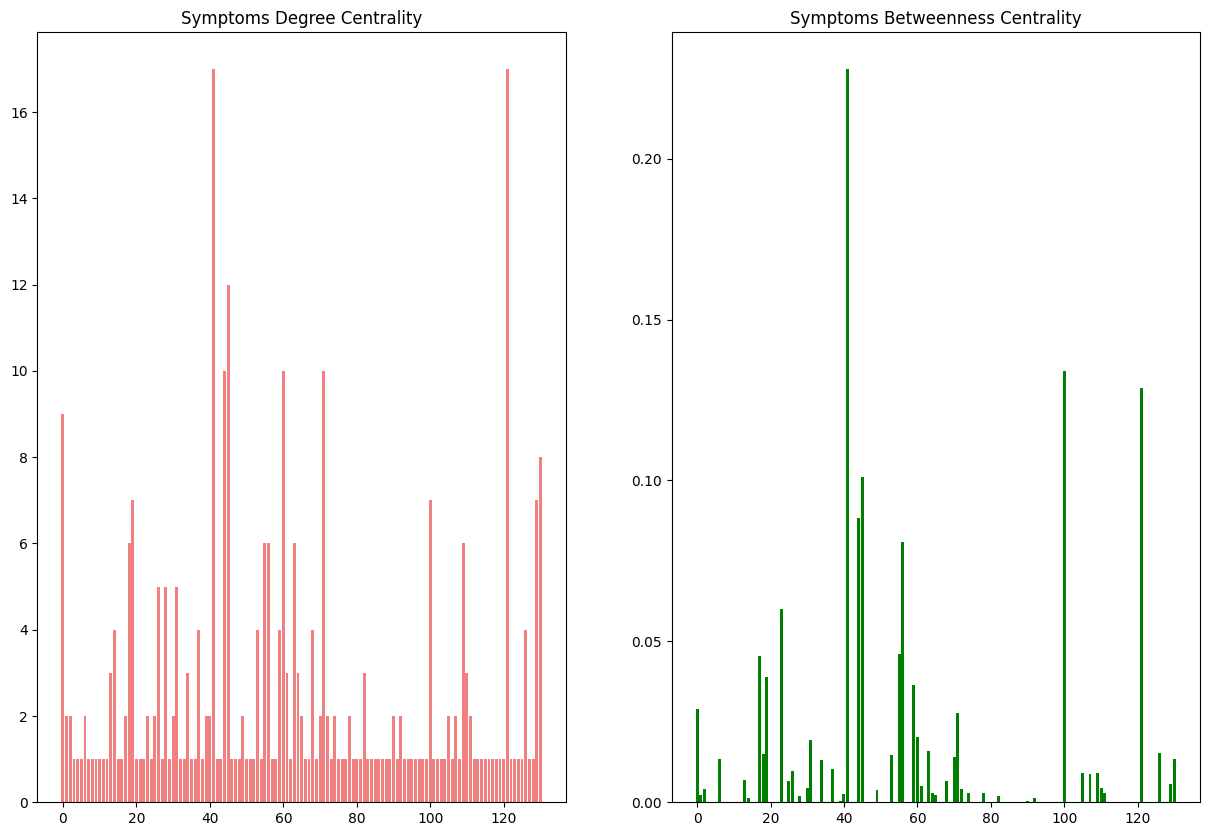

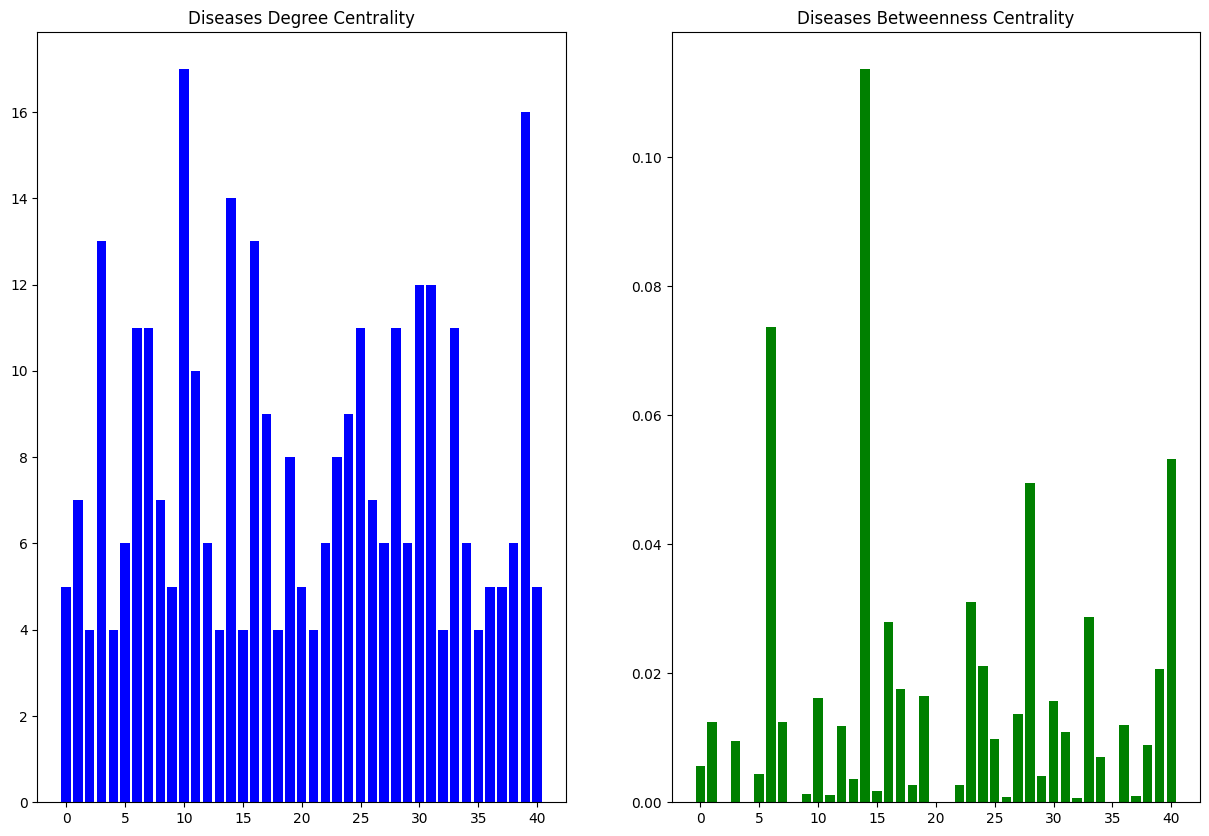

In [10]:
[kd, ks] = hid_hous(adjacency_matrix, 3)

# Compare degree centrality and betweenness centrality for the symptoms using UNIPARTITE projections
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Symptoms Degree Centrality")
plt.bar(range(ks.shape[0]), ks[:, 0], color="lightcoral", label="Degree Centrality")
plt.subplot(1, 2, 2)
plt.title("Symptoms Betweenness Centrality")

plt.bar(
    range(ks.shape[0]),
    list(symptoms_betweenness.values()),
    color="g",
    label="Betweenness Centrality",
)

# Compare degree centrality and betweenness centrality for the disease using UNIPARTITE projections
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Diseases Degree Centrality")
plt.bar(range(kd.shape[0]), kd[:, 0], color="b", label="Degree Centrality")
plt.subplot(1, 2, 2)
plt.title("Diseases Betweenness Centrality")
plt.bar(
    range(kd.shape[0]),
    list(diseases_betweenness.values()),
    color="g",
    label="Betweenness Centrality",
)

<Axes: xlabel='Symptom'>

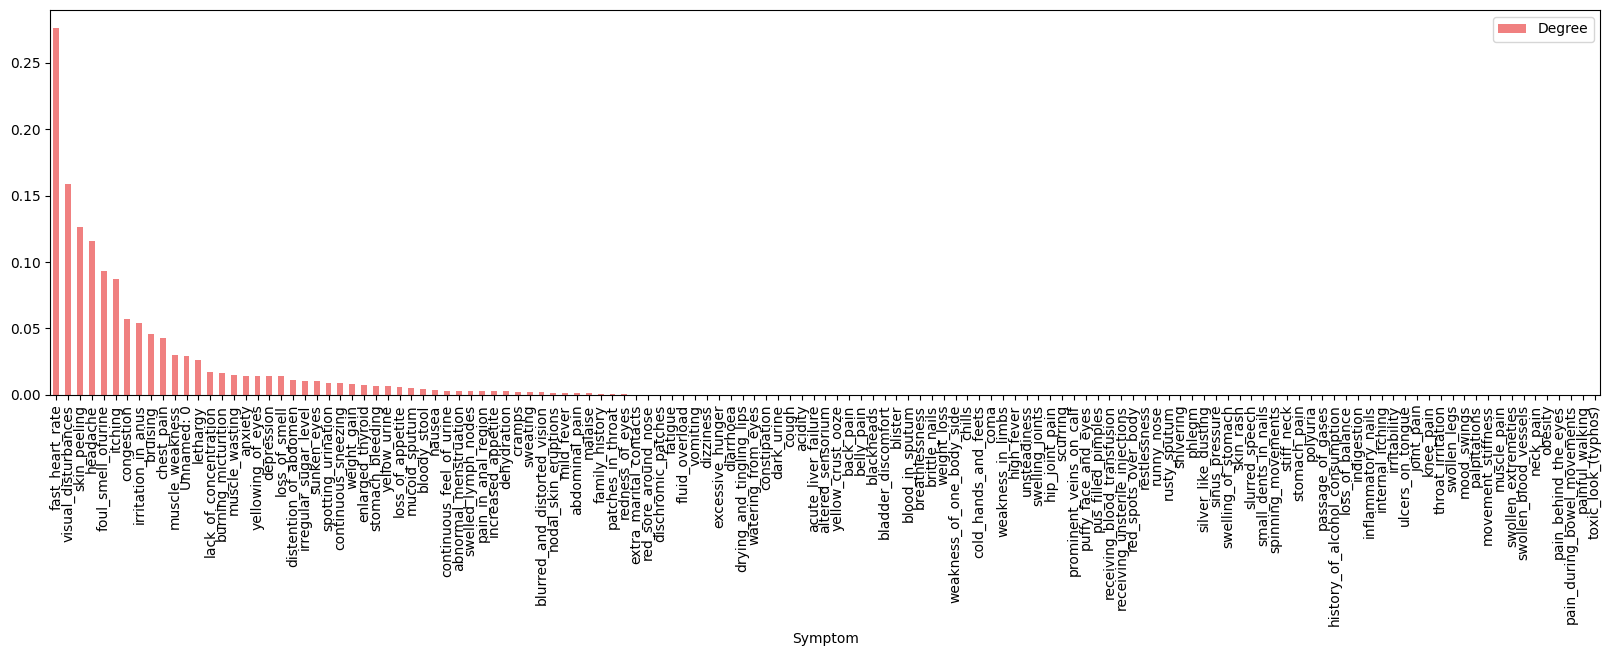

In [16]:
data_onehot = pd.read_csv("../../dataset/one_hot_encoding.csv")
names = data_onehot.columns.values.tolist()
names = names[:-1]

# Sort the symptoms by betweenness centrality
sorted_index = np.argsort(graph_betweenness_symptoms_only)[::-1]
sorted_names = {names[i]: graph_betweenness_symptoms_only[i] for i in sorted_index}
sorted_names_L1 = pd.DataFrame(sorted_names.items(), columns=['Symptom', 'Degree'])
sorted_names_L1.plot.bar(x='Symptom', y='Degree', figsize=(20,5), color="lightcoral")
